In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [4]:
df1=pd.read_csv("/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-15/XGBM & LGBM/Titanic_test.csv")
df2=pd.read_csv("/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-15/XGBM & LGBM/Titanic_train.csv")

In [5]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#checking for missing values
df1.isnull().sum()
df2.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


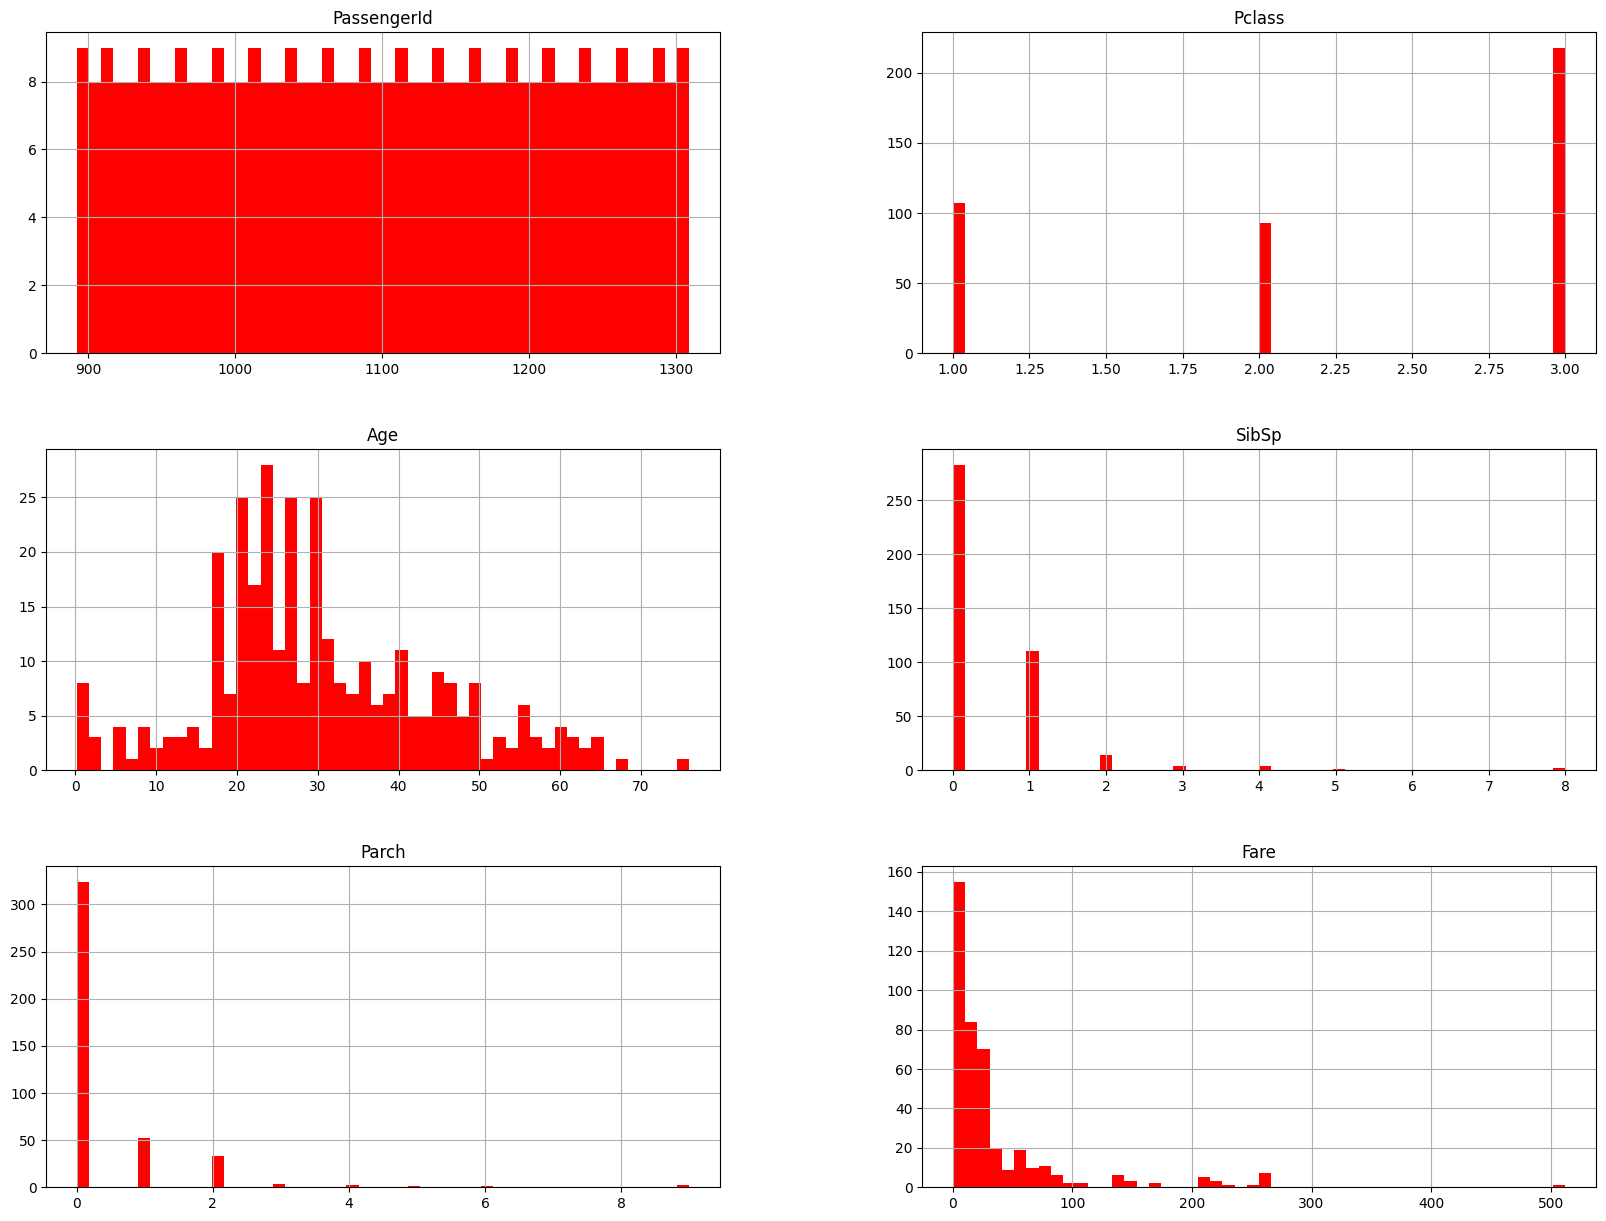

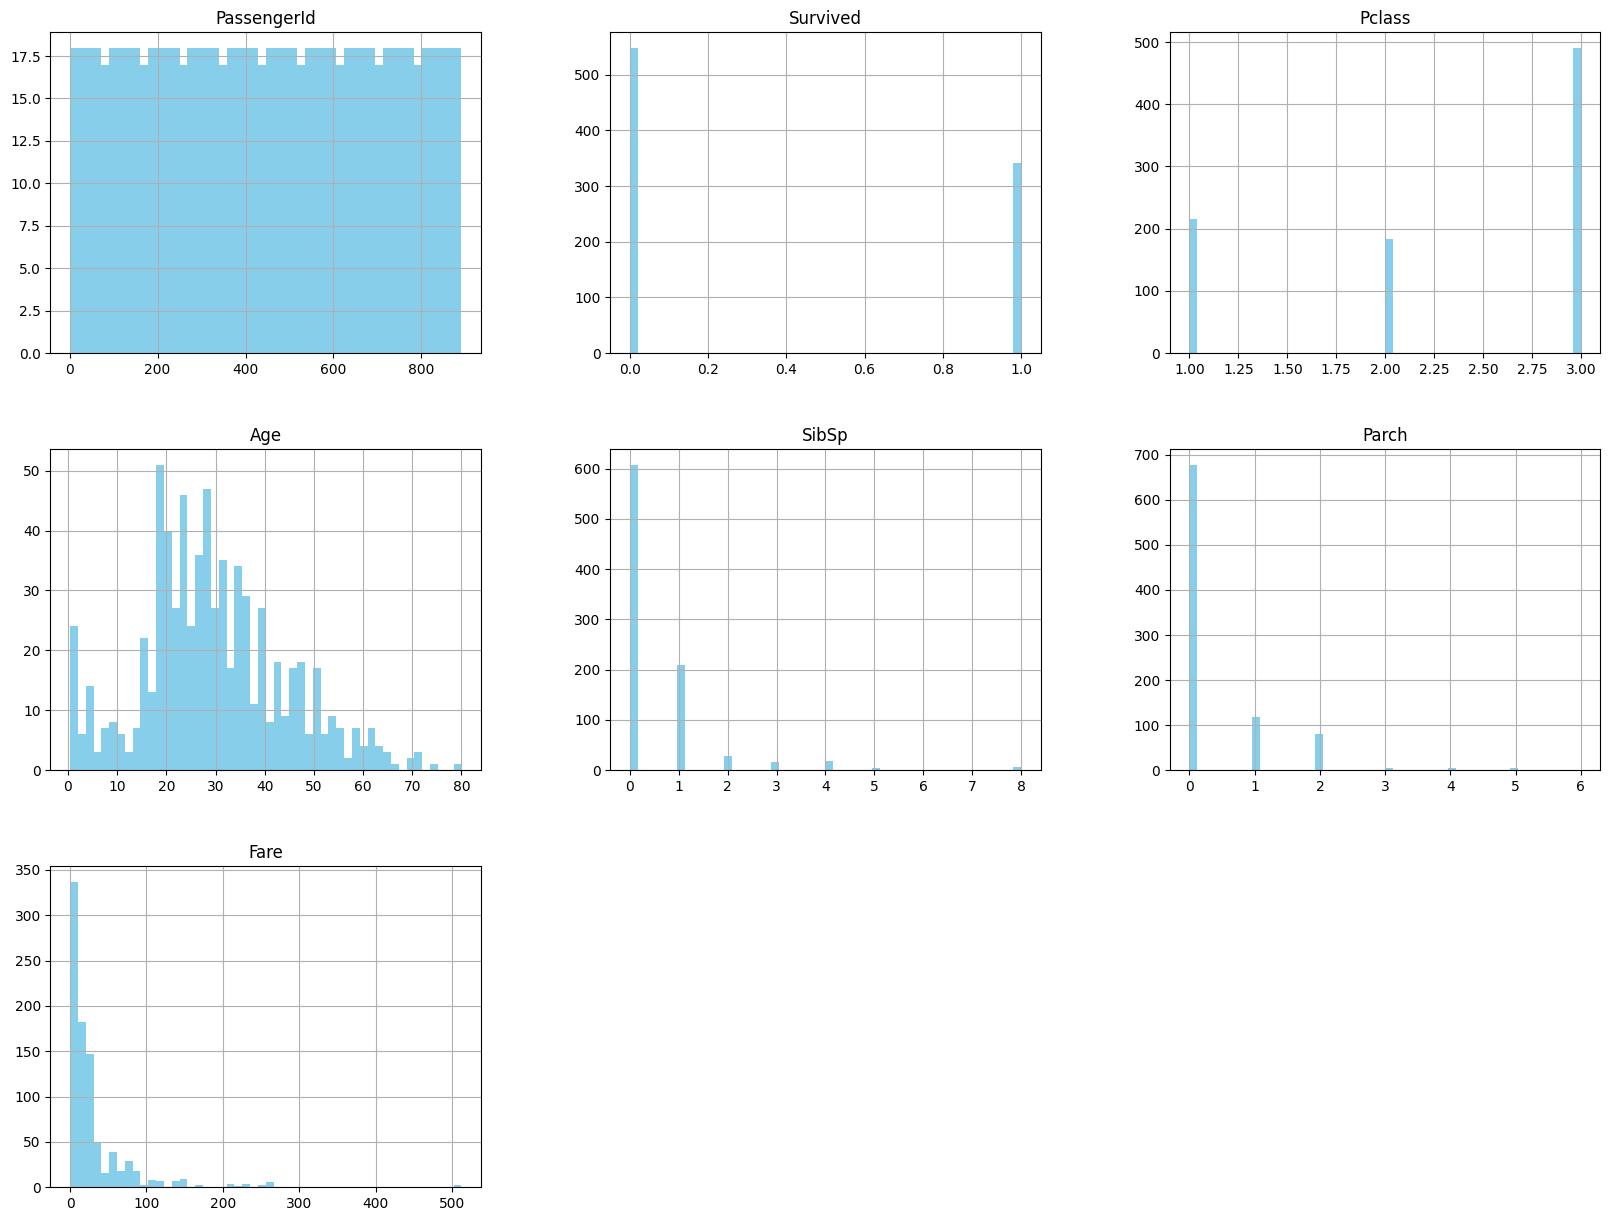

In [10]:
# 3. Data Exploration (Histograms, Box plots)
# For Dataset 1
df1.hist(bins=50, figsize=(20,15),color="red")
plt.show()

df2.hist(bins=50, figsize=(20,15),color="skyblue")
plt.show()


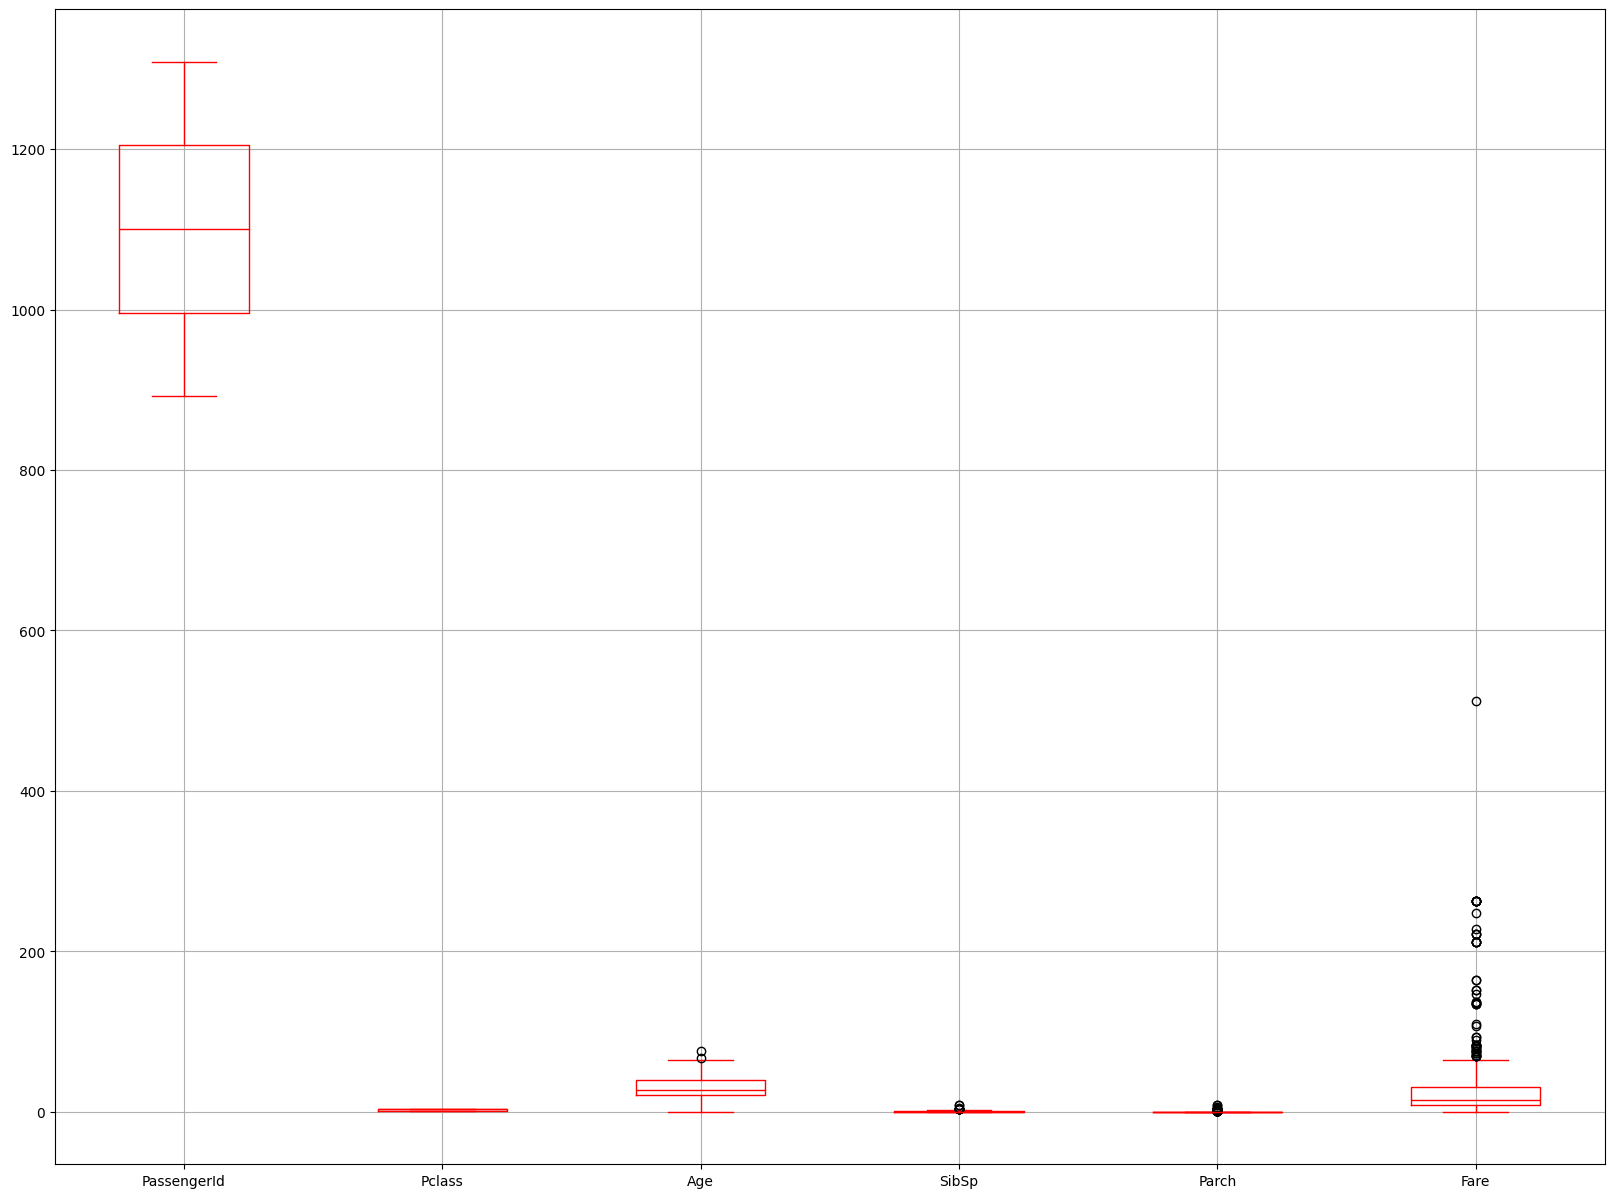

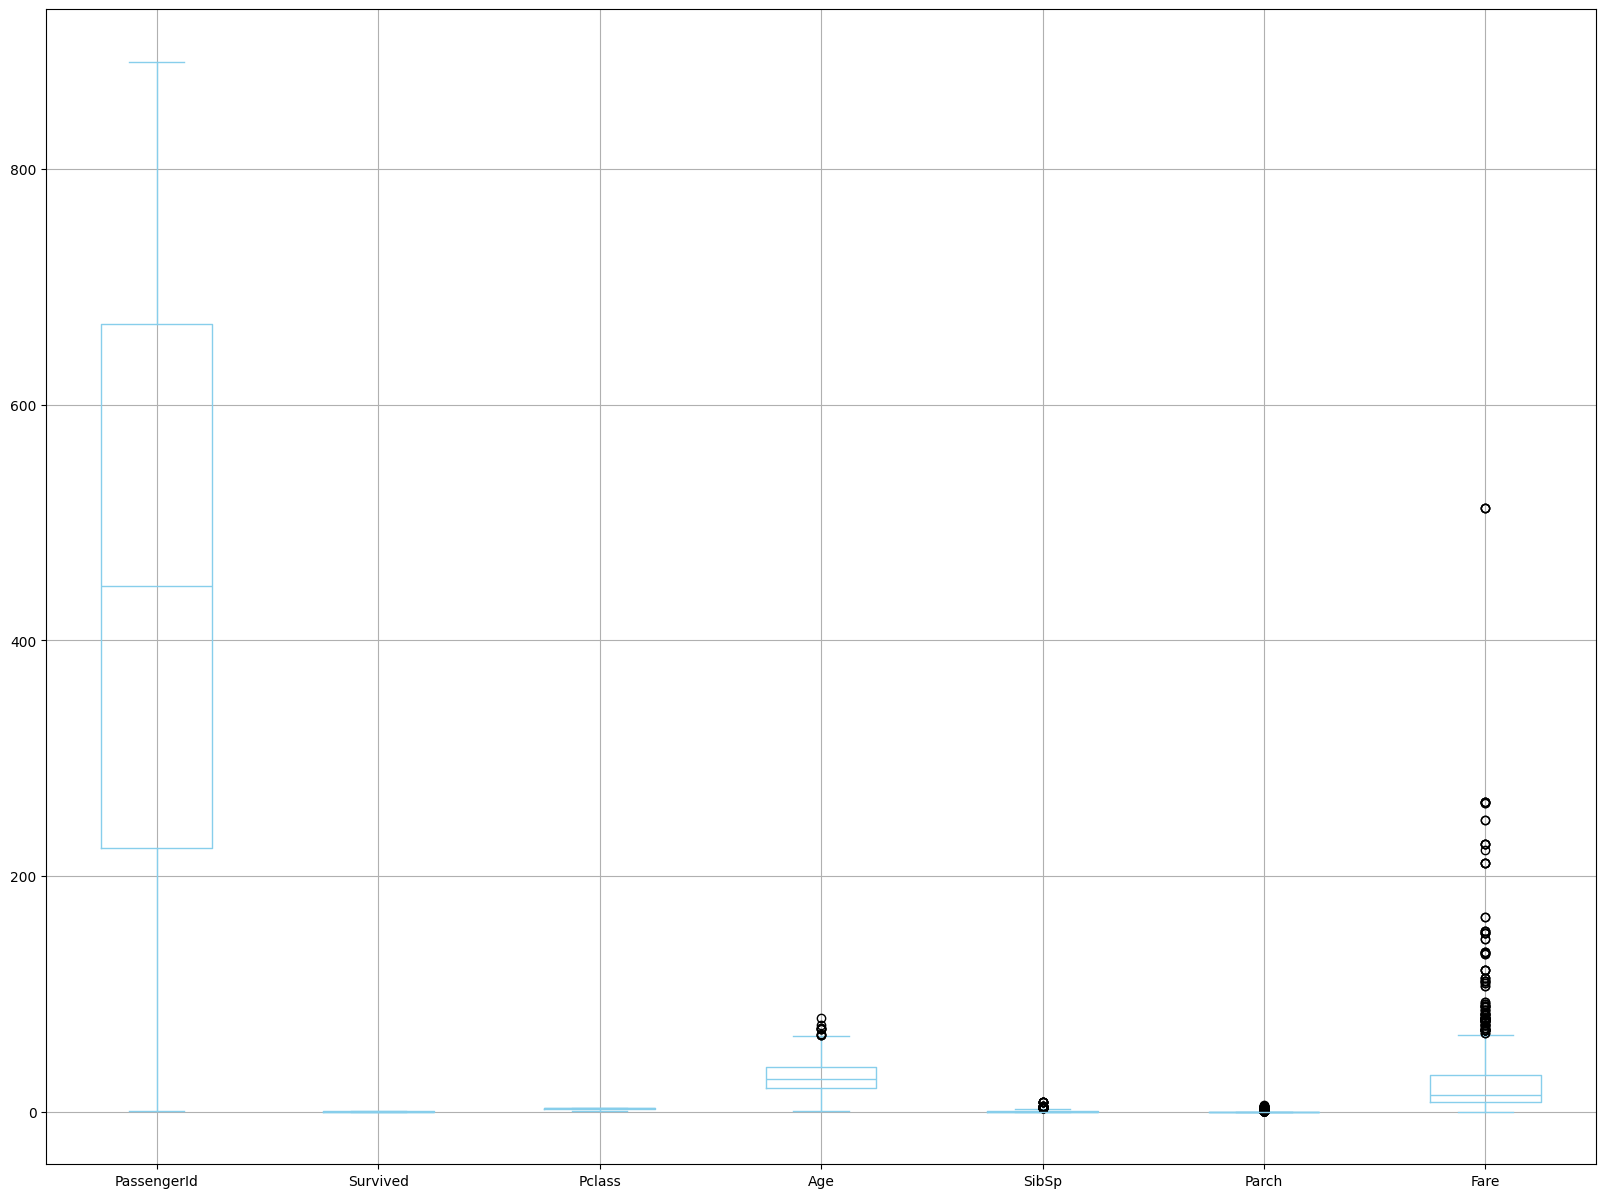

In [12]:
df1.boxplot(figsize=(20,15),color="red")
plt.show()

df2.boxplot(figsize=(20,15),color="skyblue")
plt.show()

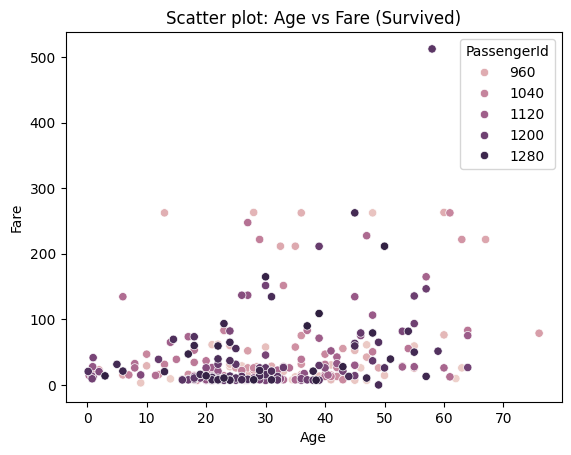

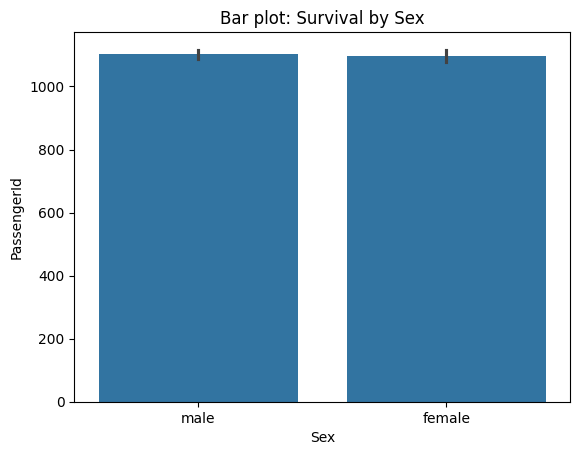

In [13]:
# 4. Data Relationships - Scatter and Bar Plots
sns.scatterplot(x='Age', y='Fare', hue='PassengerId', data=df1)
plt.title("Scatter plot: Age vs Fare (Survived)")
plt.show()

sns.barplot(x='Sex', y='PassengerId', data=df1)
plt.title("Bar plot: Survival by Sex")
plt.show()

In [14]:
# 5. Data Preprocessing
# Impute missing values for df1
df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)
df1['Fare'].fillna(df1['Fare'].median(), inplace=True)

In [15]:
# Encode categorical variables in df1
df1 = pd.get_dummies(df1, columns=['Sex', 'Embarked'], drop_first=True)
# Drop columns not required for modeling (like 'PassengerId', 'Name', 'Ticket', 'Cabin' in Titanic dataset)
df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
# 6. Build Predictive Models
# Split dataset into training and testing sets
X = df1.drop('Fare', axis=1)
y = df1['Age'] # Changed 'passengersId' to 'Survived'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

In [17]:
pip install lightgbm

In [18]:

# LightGBM Model
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 313, number of used features: 7
[LightGBM] [Info] Start training from score 29.569233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor()

In [19]:
# XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
# 7. Evaluate Performance
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [21]:
# Evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # import metrics here to make the function self-contained

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")

# LightGBM performance
evaluate_model(y_test, y_pred_lgb, "LightGBM")

# XGBoost performance
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Evaluation Metrics for LightGBM:
Mean Squared Error: 4.469187731619766
Mean Absolute Error: 0.9767970351893032
R-squared: 0.9733071176504121

Evaluation Metrics for XGBoost:
Mean Squared Error: 0.0600655270476095
Mean Absolute Error: 0.08921548115639459
R-squared: 0.9996412497878744


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# LightGBM performance
evaluate_model(y_test, y_pred_lgb, "LightGBM")

# XGBoost performance
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Evaluation Metrics for LightGBM:
Mean Squared Error: 4.469187731619766
Mean Absolute Error: 0.9767970351893032
R-squared: 0.9733071176504121

Evaluation Metrics for XGBoost:
Mean Squared Error: 0.0600655270476095
Mean Absolute Error: 0.08921548115639459
R-squared: 0.9996412497878744


In [23]:
# 8. Comparative Analysis (Cross-Validation and Hyperparameter Tuning can be added here)
# Cross-validation for LightGBM
lgb_cv = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
print(f"\nLightGBM Cross-Validation Accuracy: {np.mean(lgb_cv)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 7
[LightGBM] [Info] Start training from score 29.143713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [24]:
# Cross-validation for XGBoost
xgb_cv = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {np.mean(xgb_cv)}")

XGBoost Cross-Validation Accuracy: nan


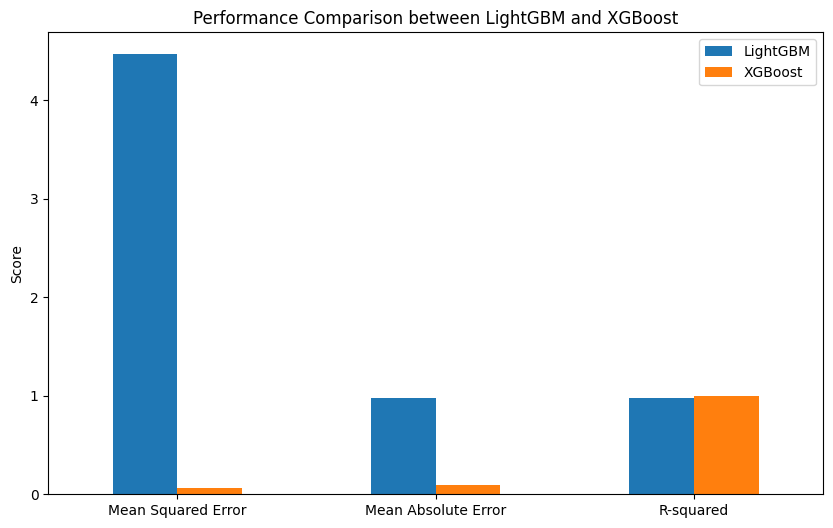

In [25]:
# Visualize the comparison
metrics = {
    'LightGBM': [mean_squared_error(y_test, y_pred_lgb), mean_absolute_error(y_test, y_pred_lgb), r2_score(y_test, y_pred_lgb)],
    'XGBoost': [mean_squared_error(y_test, y_pred_xgb), mean_absolute_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb)]
}

metrics_df = pd.DataFrame(metrics, index=['Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison between LightGBM and XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()